In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

## Reviewing the data

* Training dataset size: 12180 data points
* Testing dataset size:  4702 data points
* Number of features:    86

In [3]:
# Output data frame
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
# Output training dataset stats
print(f"---\nDataset size:\t\t{train_df.shape[0]} records, {train_df.shape[1]} features\n---")
# train_df.info()

---
Dataset size:		12180 records, 86 features
---


In [5]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [6]:
# Output testing dataset stats
print(f"---\nDataset size:\t\t{test_df.shape[0]} records, {test_df.shape[1]} features\n---")
# test_df.info()

---
Dataset size:		4702 records, 86 features
---


## Data transformation
Performing required data transformations & scaling to enable use of Supervised ML algorithms

In [7]:
# Converting categorical data to numeric and separating target feature for training data
# Importing relevant methods from sklearn's preprocessing module
from sklearn.preprocessing import LabelEncoder

# Excluding 'loan_status' from the training dataset as a target variable
X_train = train_df.drop('loan_status',axis=1)
y_train = train_df['loan_status']

# Using .get_dummy() to convert categorical data to numeric
X_train_dummy = pd.get_dummies(X_train)
y_train_label = LabelEncoder().fit_transform(y_train)
X_train_dummy.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,0,1,0,1,1,0,1,0,1,0


In [8]:
# Converting categorical data to numeric and separating target feature for testing data
# Excluding 'loan_status' from the testing dataset as a target variable
X_test = test_df.drop('loan_status',axis=1)
y_test = test_df['loan_status']

# Using .get_dummy() to convert categorical data to numeric
X_test_dummy = pd.get_dummies(X_test)
y_test_label = LabelEncoder().fit_transform(y_test)
X_test_dummy.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,0,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,0,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,0,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,0,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,0,1,0,1,1,0,1,0,1


In [9]:
# Testing if after transformation, same number of features (with same names) are present
# in both training and testing datasets
for cname in X_train_dummy.columns:
    if cname in X_test_dummy.columns:
        # print("     " + cname + "is in both train & test sets")
        cname
    else : 
        print("---\n" + cname + " is not in test set\n---")

---
debt_settlement_flag_Y is not in test set
---


In [10]:
# adding missing dummy variables to testing set. adding column 'debt_settlement_flag_Y' 
# and assigning values in it to 0 (as in 'No'/'Not Yes')
X_test_dummy['debt_settlement_flag_Y'] = 0
X_test_dummy

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,0,1,1,0,1,0,1,0,1,0
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,0,1,0,1,1,0,1,0,1,0
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,1,1,1,0,1,0,1,0,1,0
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,0,1,0,1,1,0,1,0,1,0


## Model creation, fitting & scoring

I hypothesize that Random Forest, due to its ability to better handle highly multidimentional solution spaces, will be the better performing technique than Logistic regression.

In [11]:
# Training the Logistic Regression model on the unscaled data and outputting the model score
# First, importing relevant models from sklearn
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression()
clf_LR.fit(X_train_dummy,y_train_label)
print(f"---\nLogistic regression score:\t{clf_LR.score(X_train_dummy,y_train_label)}\n---")

---
Logistic regression score:	0.6485221674876848
---


C:\Users\troub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(random_state=0,n_estimators=43)
clf_RF.fit(X_train_dummy,y_train_label)
print(f"---\nRandom Forest score:\t{clf_RF.score(X_train_dummy,y_train_label)}\n---")

---
Random Forest score:	0.9998357963875205
---


In [13]:
# Investigating RF score sensitivity to random seed & number of n_estimators
RAND = []
N_EST = []
SC = []

for rnd in [0, 42]:
    for nest in [1, 2, 3, 4, 5, 15, 30, 43, 60]:
        my_clf_RF = RandomForestClassifier(random_state=rnd,n_estimators=nest)
        my_clf_RF.fit(X_train_dummy,y_train_label)
        score = my_clf_RF.score(X_train_dummy,y_train_label)
        
        RAND.append(rnd)
        N_EST.append(nest)
        SC.append(score)
        
        print(f"---\t rand / n_est / score | {rnd} / {nest} / {score}")

---	 rand / n_est / score | 0 / 1 / 0.875615763546798
---	 rand / n_est / score | 0 / 2 / 0.8778325123152709
---	 rand / n_est / score | 0 / 3 / 0.948111658456486
---	 rand / n_est / score | 0 / 4 / 0.9482758620689655
---	 rand / n_est / score | 0 / 5 / 0.972167487684729
---	 rand / n_est / score | 0 / 15 / 0.9963875205254515
---	 rand / n_est / score | 0 / 30 / 0.9992610837438424
---	 rand / n_est / score | 0 / 43 / 0.9998357963875205
---	 rand / n_est / score | 0 / 60 / 0.9999178981937603
---	 rand / n_est / score | 42 / 1 / 0.8819376026272578
---	 rand / n_est / score | 42 / 2 / 0.8809523809523809
---	 rand / n_est / score | 42 / 3 / 0.9510673234811166
---	 rand / n_est / score | 42 / 4 / 0.9504105090311987
---	 rand / n_est / score | 42 / 5 / 0.9751231527093596
---	 rand / n_est / score | 42 / 15 / 0.99688013136289
---	 rand / n_est / score | 42 / 30 / 0.9995073891625615
---	 rand / n_est / score | 42 / 43 / 0.9998357963875205
---	 rand / n_est / score | 42 / 60 / 1.0


In [14]:
# Compile RF sesnsitivity summary data frame
summary = pd.DataFrame({'rnd':RAND, 'n_est': N_EST, 'score': SC})

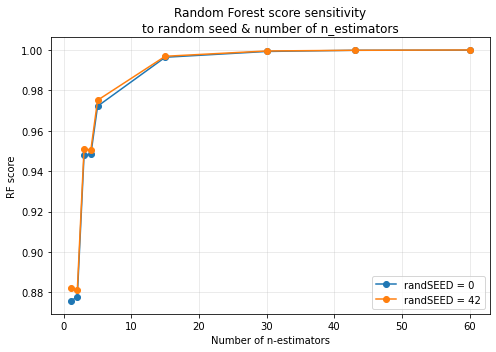

In [15]:
plt.figure(figsize=(7,5))

for r in summary.rnd.unique():
    plt.plot(summary[summary['rnd'] == r]['n_est'], summary[summary['rnd'] == r]['score'], '-o', label=f"randSEED = {r}")

    plt.grid(alpha = 0.3)
plt.legend()
plt.xlabel('Number of n-estimators')
plt.ylabel('RF score')
plt.title('Random Forest score sensitivity\nto random seed & number of n_estimators')
plt.tight_layout()

**Observation:** Based on the relationship between the number of n-estimators and RF score, we can see that out of 86 features, only up to 30 features are truly impacting the target outcome. High RF accuracy score can be achived with n-estimates ~ 15.

## Improving algorithm performance through feature scaling

Using StandardScaler during pre-processing step in attempt to further improve algorithm performance/accuracy.
Here I anticipate that scaling would have greater impact on the performance of Logistic Regression than Random Forest, since the latter one is more independent of dimensionality of the solution space and sampling density (spread of samples)

In [16]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Scaling the X_train_dummy data by using StandardScaler()
scaler = StandardScaler().fit(X_train_dummy)
X_train_dummy_scaled = scaler.transform(X_train_dummy)

In [17]:
# Transform test dataset based on scaler fitted to training data
X_test_dummy_scaled = scaler.transform(X_test_dummy)

In [18]:
# Train the Logistic Regression model on the scaled data and print the model score
clf_LR_scl = LogisticRegression()
clf_LR_scl.fit(X_train_dummy_scaled,y_train_label)
print(f"---\nLogistic regression score:\t{clf_LR_scl.score(X_train_dummy_scaled,y_train_label)}\n---")

---
Logistic regression score:	0.713136288998358
---


C:\Users\troub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf_RF_scl = RandomForestClassifier(random_state=0,n_estimators=43)
clf_RF_scl.fit(X_train_dummy_scaled,y_train_label)
print(f"---\nRandom Forest score:\t{clf_RF_scl.score(X_train_dummy_scaled,y_train_label)}\n---")

---
Random Forest score:	0.9998357963875205
---


## Conclusion

While application of feature scaling improved Logistic Regression score somewhet, the Random Forest algorithm proved superior regardless if the scaling was or was not performed.

In [20]:
pd.DataFrame([{"Algorithm":"Logistic Regression","Standard Scaling":"NO","Score": clf_LR.score(X_train_dummy,y_train_label)},
             {"Algorithm":"Logistic Regression","Standard Scaling":"YES","Score": clf_LR_scl.score(X_train_dummy_scaled,y_train_label)},
             {"Algorithm":"Random Forest","Standard Scaling":"NO","Score": clf_RF.score(X_train_dummy,y_train_label)},
             {"Algorithm":"Random Forest","Standard Scaling":"YES","Score": clf_RF_scl.score(X_train_dummy_scaled,y_train_label)}]
            ).set_index(['Algorithm','Standard Scaling'])

Score
Algorithm           Standard Scaling          
Logistic Regression NO                0.648522
                    YES               0.713136
Random Forest       NO                0.999836
                    YES               0.999836